<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Hidden Markov Models </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Architecture Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
Basically, an HMM is a statistical model designed to capture the underlying hidden states of a system based on observable outcomes. This is especially useful when working with sequential data, where the order of observations matters. Imagine you have a scenario where you observe a sequence of events, but you cannot directly observe the underlying condition that produced those events. For example, consider the weather. You can observe different weather patterns (eg sunny, cloudy, rainy) but you cannot directly understand the hidden factors that cause these weather changes (eg high or low pressure systems, wind patterns).<br><br>
In an HMM, you assume an underlying sequence of hidden states that generate the observed events. Each hidden state corresponds to a specific state or situation. In the weather example, hidden states can represent weather patterns such as sunny, cloudy, or rainy.<br><br>
HMM assumes that the hidden states form a Markov process, which means that the transition probability from one state to another depends only on the current state and not on the past history. This is called the Markov property and it simplifies the modeling process.<br><br>
Furthermore, HMM assumes that each hidden state emits observable events with some probability. These bootstrap probabilities represent the probability of observing a particular outcome given the hidden state. In the weather example, emission probabilities could represent the probability of observing certain weather conditions given each weather model. By modeling the transition probabilities between hidden states and the triggering probabilities of observable events, the HMM can learn to obtain the most likely sequence of hidden states given the observed events. It is useful for tasks like speech recognition, gesture recognition, tagging parts of words, etc.<br><br>
<b>Mathematics</b>
1. Hidden States:<br><br>
We denote the set of hidden states as S = {S1, S2, ..., SN}, where N is the total number of hidden states.<br>
The set of hidden states is represented by the equation S = S1, S2,..., SN, where N represents the number of unanswered questions.<br>
We use the formula S = S1, ‘S2,..., SN to represent [N] in terms of hidden states.<br>
To represent the set of hidden states, we use the equation S = S1, S2,..., SN, where N is the count of all possible hidden state.<br>
For the set of hidden states, we write S = S1, S2,..., N where N is the number of all the hidden state.<br>
For the set of hidden states, we write S = S1, S2,..., N where N is the number of all the hidden state.<br><br>
2. Observations:<br><br>
We denote the set of observable events as O = {O1, O2, ..., OM}, where M is the total number of possible observations. <br><br>
3. Transition Probabilities:<br><br>
The transition probability controls how large the transition is from one hidden state to another. These probabilities are usually represented by a transition matrix A, where A(i, j) denotes the transition probability from the hidden state Si to the hidden state Sj.<br><br>
4. Emission Probabilities:<br><br>
The trigger probability determines the probability that a particular outcome will be observed given the hidden state. These probabilities are usually represented by the emission matrix B, where B(i, j) denotes the emission probability of the observation Oj in the hidden state Si.<br><br>
5. Initial State Probabilities:<br><br>
The initial state probabilities represent the onset probability of each hidden state. These probabilities are usually represented by the vector π, where π(i) denotes the probability of starting from the hidden state Si.<br><br>
Using these components, we can mathematically define an HMM as a 5-corpus (S, O, A, B, π).
Given a sequence of observed events, the HMM can use a Viterbi algorithm or a forward-backward algorithm to compute the most likely sequence of hidden states that produced those observations. The HMM framework provides an efficient way to model and analyze sequence data, allowing us to make predictions from observable outcomes and gain insight into underlying hidden states.
</div>


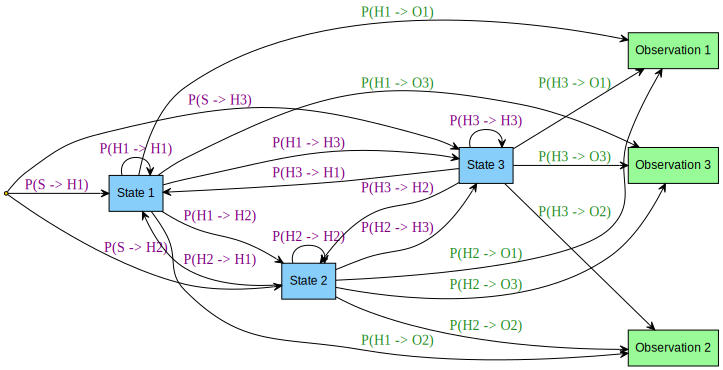

In [1]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/machine-learning-architecture-diagrams/HMM.svg'
display(SVG(filename=svg_file))

<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
The block diagram represents the HMM architecture with the following components:<br>
- The start state node (S) is represented by a yellow box labeled Start and is shaped like a point.
Specifies the starting point of the HMM. 
- Hidden states (H1, H2, H3) are represented by blue fields labeled State 1, State 2 and State 3.
They indicate the underlying state of the system, which cannot be directly observed. <br><br>
- Observation nodes (O1, O2, O3) are represented by green fields labeled as Observation 1, Observation 2 and Observation 3.They represent the observable data or metrics associated with each hidden state. - Directed edges between nodes represent transition probabilities, which represent the probability of moving from one state to another.<br><br>
Transition probabilities are in markers and indicated by purple arrows. - Directed edges from hidden states to observed nodes represent observation probabilities.<br><br>
They indicate the probability of observing a given outcome given a given hidden state. Observational probabilities are marked in the margin and indicated by green arrows.<br><br></div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Installing hmmlearn </div>

In [2]:
!pip install hmmlearn

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Importing relevant modules </div>

In [3]:
import pandas as pd
import numpy as np
from hmmlearn import hmm

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Loading the dataframe </div>


In [4]:
sales_train = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Extracting the features </div>

In [5]:
sales_train= sales_train.drop(['date_block_num','item_cnt_day'],axis=1)

In [6]:
X_train = sales_train[['shop_id', 'item_id']].values


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Initializing and training the HMM </div>

In [7]:
n_hidden_states = 5  # Number of hidden states in the HMM
model = hmm.MultinomialHMM(n_components=n_hidden_states, n_iter=100,verbose=True)
model.fit(X_train)


         1 -1589662576.80303693             +nan
         2 -44858569.06501300 +1544804007.73802400
         3 -43231873.41351562 +1626695.65149738
         4 -37853547.28242067 +5378326.13109495
         5 -30878336.32282025 +6975210.95960042
         6 -26222549.24565124 +4655787.07716902
         7 -23595254.05697578 +2627295.18867546
         8 -21955055.63440244 +1640198.42257335
         9 -20649139.44347603 +1305916.19092641
        10 -19482630.00327627 +1166509.44019976
        11 -18694858.78717340 +787771.21610288
        12 -18079892.00641093 +614966.78076247
        13 -17503152.86440773 +576739.14200320
        14 -17015387.28220360 +487765.58220413
        15 -16510587.72917770 +504799.55302591
        16 -16079622.92142162 +430964.80775608
        17 -15689079.20500121 +390543.71642040
        18 -15294905.55030947 +394173.65469175
        19 -14951749.71932742 +343155.83098205
        20 -14623505.63462205 +328244.08470537
        21 -14320736.50402691 +302769.13059514

MultinomialHMM(n_components=5, n_iter=100,
               n_trials=array([22213,  2577,  2577, ...,  7484,  7465,  7485]),
               random_state=RandomState(MT19937) at 0x7D4659DA7240,
               verbose=True)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Each line represents the iteration number, the log likelihood value at that iteration, and the change in log likelihood compared to the previous iteration.</div>

In [8]:
test_data = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
X_test = test_data[['shop_id', 'item_id']].values

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Predicting the sales for the test set </div>

In [9]:
predicted_sales = model.predict(X_test)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Creating submission file </div>

In [10]:
submission = pd.DataFrame({'ID': test_data['ID'], 'item_cnt_month': predicted_sales})
submission.to_csv('submission.csv', index=False)

In [11]:
submission

,ID,item_cnt_month
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
214195,214195,3
214196,214196,3
214197,214197,3
214198,214198,3
